# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цели исследования:**

* Открыть файл и изучить общую информацию, построить общую гистограмму.
* Удалить по возможности пропуски, избавиться от дубликатов и аномальных значений.
* Изучить параметры объектов и построить гистограммы по кажому из них.
* Выполнить задание "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление." 
* Выполнить задание "Какие факторы больше всего влияют на общую (полную) стоимость объекта?"
* Выполнить задание "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name."
* Выполнить задание "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
* Сделать выводы на основе проведённого исследования.


Таким образом, исследование пройдёт в пять этапов:

1. Обзор данных
2. Предобработка данных
3. Добавление столбцов
4. Исследовательский анализ данных.
5. Общий вывод

### Откройте файл с данными и изучите общую информацию. 

#### Импортируем данные и открываем файл

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    
    df = pd.read_csv('real_estate_data.csv', sep = '\t')
    
except:
    
    df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

*При открытии файла данные склеились, при помощи sep = '\t' разделили их.*

#### Изучим общую информацию о полученном датафрейме

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### ***Описание данных:***

•	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

•	balcony — число балконов

•	ceiling_height — высота потолков (м)

•	cityCenters_nearest — расстояние до центра города (м)

•	days_exposition — сколько дней было размещено объявление (от публикации до снятия)

•	first_day_exposition — дата публикации

•	floor — этаж

•	floors_total — всего этажей в доме

•	is_apartment — апартаменты (булев тип)

•	kitchen_area — площадь кухни в квадратных метрах (м²)

•	last_price — цена на момент снятия с публикации

•	living_area — жилая площадь в квадратных метрах (м²)

•	locality_name — название населённого пункта

•	open_plan — свободная планировка (булев тип)

•	parks_around3000 — число парков в радиусе 3 км

•	parks_nearest — расстояние до ближайшего парка (м)

•	ponds_around3000 — число водоёмов в радиусе 3 км

•	ponds_nearest — расстояние до ближайшего водоёма (м)

•	rooms — число комнат

•	studio — квартира-студия (булев тип)

•	total_area — общая площадь квартиры в квадратных метрах (м²)

•	total_images — число фотографий квартиры в объявлении

#### Построим общую гистограмму для всех числовых столбцов таблицы

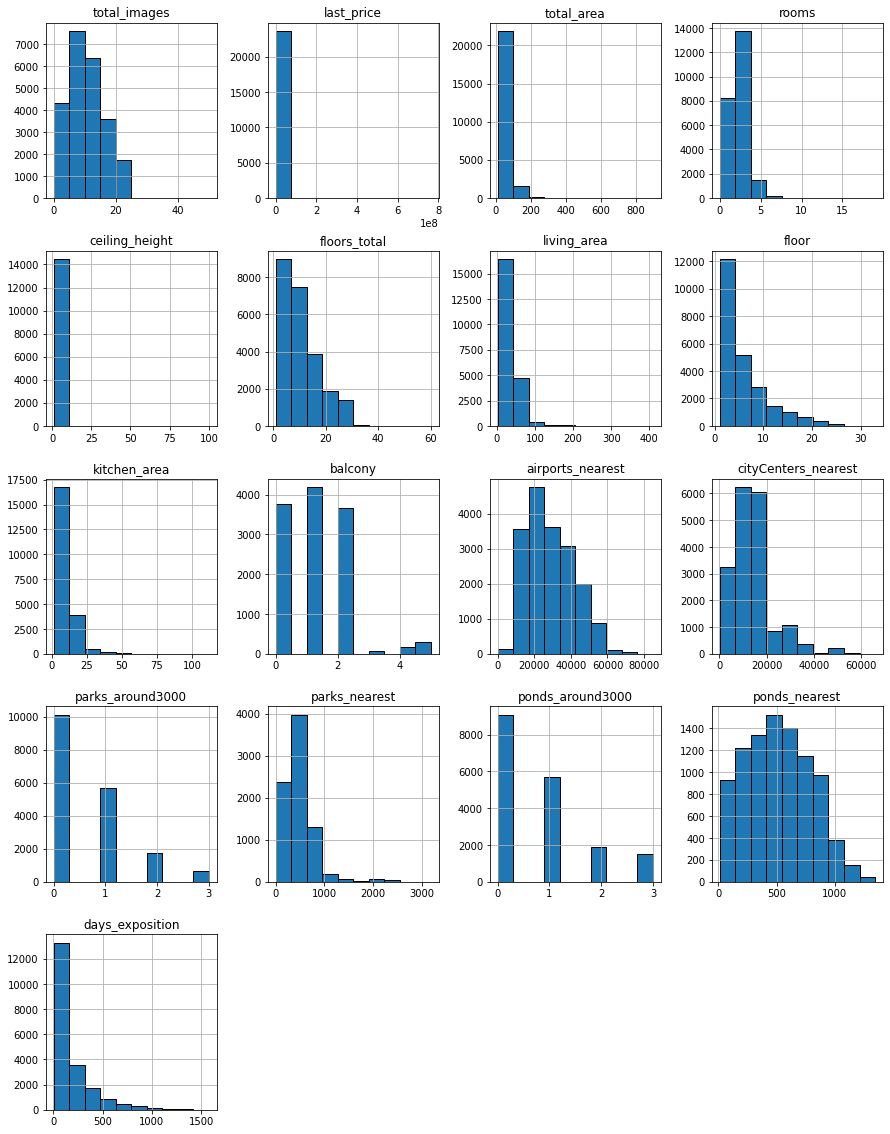

In [5]:
df.hist(figsize=(15, 20), ec='black')
plt.show()

**Вывод:**

Первично изучив данные можно сказать, что всего имеем 23699 записи, в большом количестве столбцов есть пропуски и неверный тип данных.
    

### Предобработка данных

#### Переименуем имена столбцов

In [6]:
df.rename(columns={'cityCenters_nearest':'centers_nearest', 'parks_around3000':'parks_3000', 'ponds_around3000':'ponds_3000', 'first_day_exposition':'first_day','days_exposition':'days'}, inplace=True)

In [7]:
df.head()

,total_images,last_price,total_area,first_day,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,centers_nearest,parks_3000,parks_nearest,ponds_3000,ponds_nearest,days
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Заменили имена столбцов для более короткой записи и удобства.

#### Определим в каких столбцах есть пропуски и заменим их там, где это нужно

In [8]:
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day               0
rooms                   0
ceiling_height       9195
floors_total           86
living_area          1903
floor                   0
is_apartment        20924
studio                  0
open_plan               0
kitchen_area         2278
balcony             11519
locality_name          49
airports_nearest     5542
centers_nearest      5519
parks_3000           5518
parks_nearest       15620
ponds_3000           5518
ponds_nearest       14589
days                 3181
dtype: int64

**Вывод по пропускам**

<u>9195</u> ***ceiling_height:*** В части значений по этому столбцу есть пропуски, на исследование они не повлияют. <u>Заменять не будем.</u> 

<u>86</u> ***floors_total:*** Пропусков в этом столбце мало, на исследование не повлияют. <u>Удалим строки без этажей.</u> 

<u>1903</u> ***living_area:*** Пропусков немного, но данные в этом столбце важны для исследования. Но т.к. их нечем заполнить, <u>заменять их не будем.</u> 

<u>20924</u> ***is_apartment:*** Скорее всего пропуски образовались из-за того, что при заполнении не указали тип объекта. Можем <u>заменить эти пропуски на False.</u>

<u>2278</u> ***kitchen_area:*** При заполнении объявлений не было точных данных о площади кухни. Заполнить нам нечем, поэтому <u>заменять не будем.</u> 

<u>11519</u> ***balcony:*** Не указано отсутствие балконов. <u>Заменим пропуски нулями.</u>

<u>49</u> ***locality_name:*** Пропусков мало, они не повлияют на исследование. Поэтому <u>удалим строки без города.</u> 

<u>5542</u> ***airports_nearest:*** Нет аэропортов поблизости или отсутствуют картографические данные по ним. Пропуски не повлияют на исследование, поэтому <u>заменять не будем.</u> 

<u>5519</u> ***centers_nearest:*** Вероятно, центр города не близко, <u>не будем заменять<u> 

<u>5518</u> ***parks_3000:*** Нет парков в радиусе 3км или отсутствуют картографические данные по ним. Пропуски не повлияют на исследование, поэтому <u>заменять не будем. </u> 

<u>15620</u> ***parks_nearest:*** Нет парков поблизости или отсутствуют картографические данные по ним. Пропуски не повлияют на исследование, поэтому <u>заменять не будем. </u>

<u>5518</u> ***ponds_3000:***  Нет водоёмов в радиусе 3км или отсутствуют картографические данные по ним. Пропуски не повлияют на исследование, поэтому <u>заменять не будем. </u>

<u>14589</u> ***ponds_nearest:*** Нет водоёмов поблизости или отсутствуют картографические данные по ним. Пропуски не повлияют на исследование, поэтому <u>заменять не будем. </u>

<u>3181</u> ***days:*** В части объявлений отсутствует информация о времени размещения, хотя такие данные должны быть получены автоматически, скорее всего такое произошло из-за технической ошибки. Данные в этом столбце важны, но заполнить их нечем, поэтому <u>заменять не будем. </u>


**Заменим и заполним пропущенные значения**

In [9]:
df['is_apartment'].fillna(False, inplace=True)
df['is_apartment'].isna().sum()

0

In [10]:
df['balcony'].fillna(0, inplace=True)
df['balcony'].isna().sum()

0

In [11]:
df.dropna(subset=['locality_name'],inplace=True)
df['locality_name'].isna().sum()

0

In [12]:
df.dropna(subset=['floors_total'],inplace=True)
df['floors_total'].isna().sum()

0

#### **Рассмотрим типы данных и преобразуем их там, где это нужно**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_images      23565 non-null  int64  
 1   last_price        23565 non-null  float64
 2   total_area        23565 non-null  float64
 3   first_day         23565 non-null  object 
 4   rooms             23565 non-null  int64  
 5   ceiling_height    14481 non-null  float64
 6   floors_total      23565 non-null  float64
 7   living_area       21700 non-null  float64
 8   floor             23565 non-null  int64  
 9   is_apartment      23565 non-null  bool   
 10  studio            23565 non-null  bool   
 11  open_plan         23565 non-null  bool   
 12  kitchen_area      21343 non-null  float64
 13  balcony           23565 non-null  float64
 14  locality_name     23565 non-null  object 
 15  airports_nearest  18041 non-null  float64
 16  centers_nearest   18064 non-null  float6

*Меняем тип last_price для экономии памяти*

In [14]:
df['last_price'] = df['last_price'].astype('int64')

*Меняем тип balcony для экономии памяти*

In [15]:
df['balcony'] = df['balcony'].astype('int64')

*Меняем тип first_day для работы с датой*

In [16]:
df['first_day'] = pd.to_datetime(df['first_day'], format='%Y-%m-%dT%H:%M:%S')

*Меняем тип is_apartment для работы с булевым значением*

In [17]:
df['is_apartment'] = df['is_apartment'].astype('bool')

*Меняем тип floors_total для экономии памяти*

In [18]:
df['floors_total']=df['floors_total'].astype('int64')

In [19]:
df.dtypes

total_images                 int64
last_price                   int64
total_area                 float64
first_day           datetime64[ns]
rooms                        int64
ceiling_height             float64
floors_total                 int64
living_area                float64
floor                        int64
is_apartment                  bool
studio                        bool
open_plan                     bool
kitchen_area               float64
balcony                      int64
locality_name               object
airports_nearest           float64
centers_nearest            float64
parks_3000                 float64
parks_nearest              float64
ponds_3000                 float64
ponds_nearest              float64
days                       float64
dtype: object

*Типы данных изменились верно, без ошибок*

#### **Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты**

*Приведём все строки к нижнему регистру для точности обработки*

In [20]:
df['locality_name'] = df['locality_name'].str.lower()

<u>Неявные дубликаты</u>

In [21]:
df['locality_name'].unique().shape[0]

364

Всего имеем 364 значения.

In [22]:
df['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской поселок большая ижора',
       'городской поселок янино-1', 'городской посёлок будогощь',
       'городской посёлок виллози', 'городской посёлок лесогорский',
       'городской посёлок мга', 'городской посёлок назия',
       'городской посёлок новоселье', 'городской посёлок павлово',
       'городской посёлок рощино', 'городской посёлок свирьстрой',
       'городской посёлок советский', 'городской посёлок фёдоровское',
       'городской посёлок янино-1', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка

*После анализа данного столбца можно встретить несколько повторяющихся данных с разными значениями <u>посёлок - поселок</u> и <u>городской поселок - поселок городского типа</u>, поэтому мы их заменим.*

**Заменяем поселок на посёлок и городской поселок на поселок городского типа**

In [23]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace('городской поселок','поселок городского типа')

In [24]:
df['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка',
       'деревня горбунки', 'деревня гостилицы', 'деревня заклинье',
       'деревня заневка', 'деревня зимитицы', 'деревня извара',
       'деревня иссад', 'деревня калитино', 'деревня кальтино',
       'деревня камышовка', 'деревня каськово', 'деревня келози',
       'деревня кипень', 'деревня кисельня', 'деревня колтуши',
       'деревня коркино', 'деревня котлы', 'деревня кривко',
       'деревня кудрово', 'деревня кузьмолово', 'деревня курковицы',
       'дер

In [25]:
df['locality_name'].unique().shape[0]

323

Всего обработали 41 повторяющееся значение.

<u>Явные дубликаты</u>

In [26]:
df.duplicated().sum()

0

*Явных дубликатов нет*

#### **Поиск и устранение  аномальных значений** 

**Посмотрим минимальные и максимальные значения чтобы сдлелать выводы и отбросить аномальные значения**

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23565.0,9.878421e+00,5.681156e+00,0.0,6.00,9.00,14.0,50.0
last_price,23565.0,6.540058e+06,1.091093e+07,12190.0,3400000.00,4646000.00,6790000.0,763000000.0
total_area,23565.0,6.032282e+01,3.565706e+01,12.0,40.00,52.00,69.7,900.0
rooms,23565.0,2.070656e+00,1.078591e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14481.0,2.771283e+00,1.261983e+00,1.0,2.51,2.65,2.8,100.0
floors_total,23565.0,1.067588e+01,6.594823e+00,1.0,5.00,9.00,16.0,60.0
living_area,21700.0,3.445482e+01,2.204536e+01,2.0,18.60,30.00,42.3,409.7
floor,23565.0,5.878124e+00,4.871485e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21343.0,1.056099e+01,5.900630e+00,1.3,7.00,9.10,12.0,112.0
balcony,23565.0,5.936771e-01,9.606601e-01,0.0,0.00,0.00,1.0,5.0


Проанализировав данную таблицу можно слделать выводы по следующим столбцам:

<u>*total_images:*</u> Выглядит нормально, не будем ничего менять.

<u>*last_price:*</u> Минимальное значение 12190, что выглядит не вполне реально для рынка недвижимости Санкт-Петербурга и его окресностей. Максимальное значение 763.000.000 возможно для элитной недвижимости. Обработаем аномальные и выбивающиеся значения этого столбца.


<u>*total_area:*</u>  Минимальное значение 12, явно ошибка. Максимальное значение 900, можно тоже предположить, что это элитное жильё. Обработаем аномальные и выбивающиеся значения этого столбца.


<u>*rooms:*</u> Минимальное значение 0, явно ошибка. Максимальное значение 19, что вполне реально. Обработаем аномальные и выбивающиеся значения этого столбца.


<u>*ceiling_height:*</u> Минимальное значение 1, явно ошибка. Максимальное значение 100, тоже ошибка. Обработаем аномальные и выбивающиеся значения этого столбца.


<u>*floors_total:*</u> Минимальное значение 1, что нормально. Максимальное значение 60, явно ошибка.Обработаем аномальные и выбивающиеся значения этого столбца.


<u>*living_area:*</u> Минимальное значение 2.0, явно ошибка. Максимальное значение 409.7, что возможно для элитного жилья. Обработаем аномальные и выбивающиеся значения этого столбца.


<u>*floor:*</u> Выглядит нормально, не будем ничего менять.

<u>*kitchen_area:*</u> Минимальное значение 1.3, явно ошибка. Максимальное значение 112, возможно элитное жильё. Обработаем аномальные и выбивающиеся значения этого столбца.


<u>*balcony:*</u> Выглядит нормально, не будем ничего менять.

<u>*airports_nearest:*</u> Минимальное значение 0, явно ошибка. Максимальное значение 84869.0, что нормально. Обработаем аномальные и выбивающиеся значения этого столбца.


<u>*centers_nearest :*</u> Выглядит нормально, не будем ничего менять.

<u>*parks_3000:*</u> Выглядит нормально, не будем ничего менять.

<u>*parks_nearest:*</u> Выглядит нормально, не будем ничего менять.

<u>*parks_3000:*</u> Выглядит нормально, не будем ничего менять.

<u>*ponds_nearest:*</u> Выглядит нормально, не будем ничего менять.

<u>*days:*</u> Минимальное значение 1, что в принципе возможно(объявление почти сразу сняли). Максимальное 1580 (больше 4 лет), старое необновляющееся обявление. Обработаем аномальные и выбивающиеся значения этого столбца.


**Построим и проанализируем диаграммы размахов по каждому значению, чтобы понять какие данные нужно отбросить для более точного анализа. А так же удалим аномальные значения.(я не буду удалять абсолютно все выбросы так как боюсь что исследование не будет  точным)**

**Значения last_price**

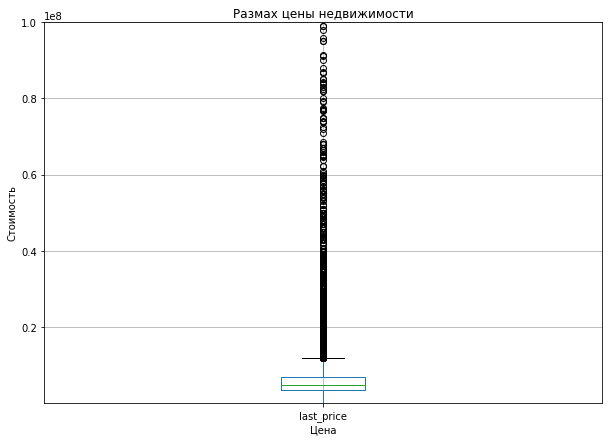

In [28]:
df.boxplot(column='last_price', figsize=(10, 7))
plt.title('Размах цены недвижимости')
plt.ylim(1,100000000)
plt.ylabel('Стоимость')
plt.xlabel('Цена')
plt.show()

*Изучив данную диаграмму размаха сделаем вывод,что стоит удалить выбросы до 100.000 и после 100.000.000. Посчитаем и удалим такие значения.*

In [29]:
print('Значений отбросим', df.loc[(df['last_price'] < 100000) | (df['last_price'] > 100000000), 'ceiling_height'].count())

Значений отбросим 26


In [30]:
df.drop(index=df.loc[(df['last_price'] < 100000) | (df['last_price'] > 100000000), 'ceiling_height'].index,inplace=True)

**Значения total_area**

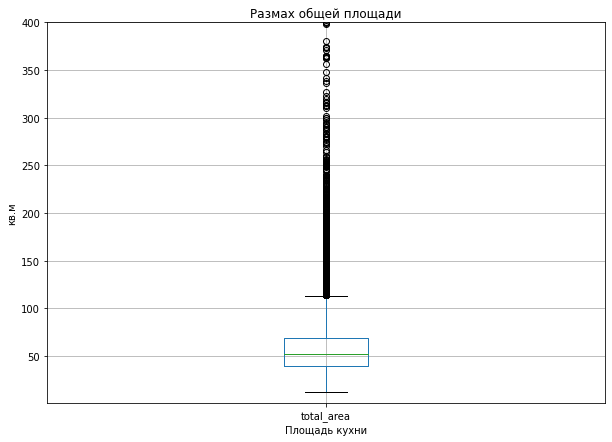

In [31]:
df.boxplot(column='total_area', figsize=(10, 7))
plt.title('Размах общей площади')
plt.ylim(1, 400)
plt.ylabel('кв.м')
plt.xlabel('Площадь кухни')
plt.show()

 *Изучив данную диаграмму размаха сделаем вывод,что стоит удалить выбросы после 300кв.м . Минимальная общая площадь по строительным нормам - 15 кв.м. Посчитаем и удалим такие значения.*

In [32]:
print('Значений отбросим',  df.loc[(df['total_area'] < 15) | (df['total_area'] > 300), 'total_area'].count())

Значений отбросим 51


In [33]:
df.drop(index= df.loc[(df['total_area'] < 15) | (df['total_area'] > 300), 'total_area'].index,inplace=True)

**Значения rooms**

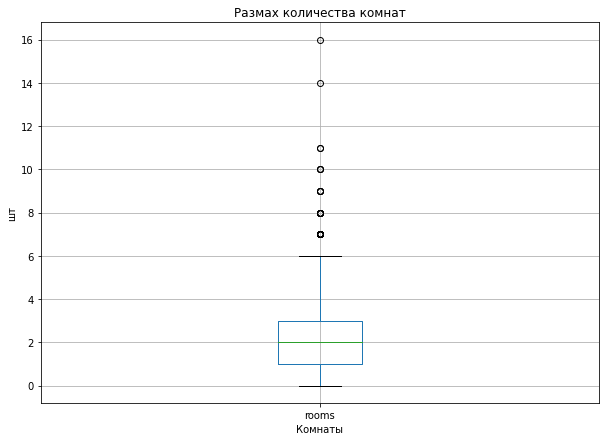

In [34]:
df.boxplot(column='rooms', figsize=(10, 7))
plt.title('Размах количества комнат')
plt.ylabel('шт')
plt.xlabel('Комнаты')
plt.show()

*Меньше одной комнаты не может быть проверим может это студии или квартиры со свободной планировкой. Удалим выбросы после 8. Посчитаем сколько таких значений и удалим их.*

In [35]:
print('Знчения без комнат и типа:',df.query('rooms == 0 and ~open_plan and ~studio')['rooms'].count())

Знчения без комнат и типа: 0


In [36]:
print('Значений отбросим', df.loc[df['rooms'] > 8, 'rooms'].count())

Значений отбросим 11


In [37]:
df.drop(index=df.loc[df['rooms'] > 8, 'rooms'].index,inplace=True)

**Значения ceiling_height**

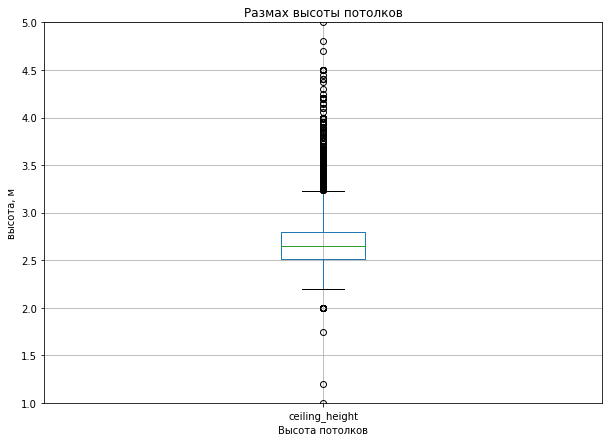

In [38]:
df.boxplot(column='ceiling_height', figsize=(10, 7))
plt.title('Размах высоты потолков')
plt.ylim(1, 5)
plt.ylabel('высота, м')
plt.xlabel('Высота потолков')
plt.show()

*Возможно квартиры с высотой от 25м до 36м это ошибка в вводе данных, такие значения мы разделим на 10. Посчитаем и удалим квартиры с потолками меньше 2.5м так как они не соответствуют строительным нормам. Так же посчитаем и удалим с потолки выше 4м.*

In [39]:
df.update(df[(df['ceiling_height'] >= 25) & (df['ceiling_height'] <= 36)]['ceiling_height']/10)

In [40]:
print('Значений отбросим', df.loc[(df['ceiling_height'] < 2.5) | (df['ceiling_height'] > 4), 'ceiling_height'].count())

Значений отбросим 121


In [41]:
df.drop(index= df.loc[(df['ceiling_height'] < 2.5) | (df['ceiling_height'] > 4), 'ceiling_height'].index,inplace=True)

**Значения floors_total**

*Самое высокое жилое здание в СПб и его окрестностях — это ЖК «Александр Невский» у которого 37 этажей (2 из которых подземные). Так же есть Лахта-центр с количеством этажей 87, но оно не является жилым. Поэтому посчитаем и удалим значения больше 35*

In [42]:
print('Значений отбросим',  df.loc[df['floors_total'] >35, 'floors_total'].count())

Значений отбросим 5


In [43]:
df.drop(df.loc[df['floors_total'] >35, 'floors_total'].index,inplace=True)

**Значения living_area**

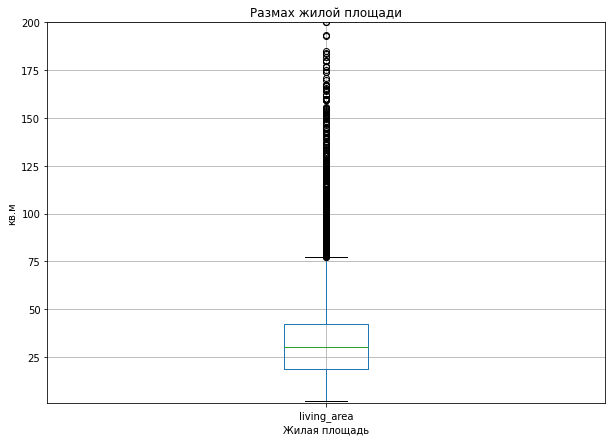

In [44]:
df.boxplot(column='living_area', figsize=(10, 7))
plt.title('Размах жилой площади')
plt.ylim(1, 200)
plt.ylabel('кв.м')
plt.xlabel('Жилая площадь')
plt.show()

*По строительным нормам минимальная жилая площадь 9 кв.м. Удалим выбросы после 150кв.м. Посчитаем и удалим такие значения.*

In [45]:
print('Значений отбросим',  df.loc[(df['living_area'] < 9) | (df['living_area'] > 150), 'living_area'].count())

Значений отбросим 73


In [46]:
df.drop(index=df.loc[(df['living_area'] < 9) | (df['living_area'] > 150), 'living_area'].index,inplace=True)

**Значения kitchen_area**

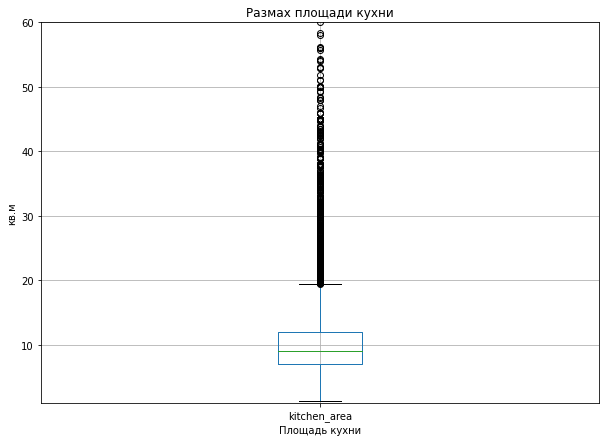

In [47]:
df.boxplot(column='kitchen_area', figsize=(10, 7))
plt.title('Размах площади кухни')
plt.ylim(1,60)
plt.ylabel('кв.м')
plt.xlabel('Площадь кухни')
plt.show()

*Удалим выбросы после 40 кв.м. Так же по строительным нормам минимальная площадь кухни — 5 кв.м. Посчитаем и удалим такие значения*

In [48]:
print('Значений отбросим',  df.loc[(df['kitchen_area'] < 5) | (df['kitchen_area'] > 40), 'kitchen_area'].count())

Значений отбросим 204


In [49]:
df.drop(index=df.loc[(df['kitchen_area'] < 5) | (df['kitchen_area'] > 40), 'kitchen_area'].index,inplace=True)

**Значения airports_nearest**

*Невозможно расстояние до аэропорта 0м. Минимальное расстояние должно быть минимум 5000м (по строительным нормам). Посчитаем сколько таких значений и удалим их.*

In [50]:
print('Значений отбросим',  df.loc[df['airports_nearest'] < 5000, 'airports_nearest'].count())

Значений отбросим 1


In [51]:
df.drop(index=df.loc[df['airports_nearest'] < 5000, 'airports_nearest'].index,inplace=True)

In [52]:
df.reset_index(drop=True,inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23061 entries, 0 to 23060
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   total_images      23061 non-null  int64         
 1   last_price        23061 non-null  int64         
 2   total_area        23061 non-null  float64       
 3   first_day         23061 non-null  datetime64[ns]
 4   rooms             23061 non-null  int64         
 5   ceiling_height    14099 non-null  float64       
 6   floors_total      23061 non-null  int64         
 7   living_area       21236 non-null  float64       
 8   floor             23061 non-null  int64         
 9   is_apartment      23061 non-null  bool          
 10  studio            23061 non-null  bool          
 11  open_plan         23061 non-null  bool          
 12  kitchen_area      20881 non-null  float64       
 13  balcony           23061 non-null  int64         
 14  locality_name     2306

*Всего удалили значений:*

In [54]:
23699-23061

638

####  **Вывод:** 

* Привели имена столбцов к единому стилю.
* Рассмотрели уникальные значения в столбце с названиями и устранили неявные дубликаты
* Определили в каких столбцах есть пропуски и заменили их там, где это нужно
* Рассмотрели типы данных и преобразовали их там, где это было нужно:

    **last_price** - <u>int64</u>
    
    **balcony** - <u>int64</u>
    
    **first_day** - <u>date</u>
    
    **is_apartment** - <u>bool</u>
    
    **floors_total** - <u>int64</u>
 
    
* Построили диаграммы размаха, нашли аномальные значения в столбцах и отбросили их:

last_price - отбросили **26** значений

total_area - отбросили **51** значение 

rooms - отбросили **11** значения

ceiling_height - отбросили **121** значений

floors_total - отбросили **5** значений

living_area - отбросили **73** значение

kitchen_area - отбросили **204** значения

airports_nearest -отбросили **1** значение


### Посчитайте и добавьте в таблицу новые столбцы

***Добавим столбец с ценой одного квадратного метра***

In [55]:
df['price_one_meter'] = df['last_price'] / df['total_area']

***Добавим столбец с денём недели публикации объявления (0 - понедельник, 1 - вторник и т.д.)***

In [56]:
df['weekday'] = df['first_day'].dt.weekday

***Добавим столбец с месяцем публикации объявления***

In [57]:
df['month'] = df['first_day'].dt.month

***Добавим столбец с годом публикации объявления***

In [58]:
df['year'] = df['first_day'].dt.year

#### ***Добавим столбец с типом этажа квартиры (значения — «первый», «последний», «другой»)*** 

In [59]:
def get(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [60]:
df['floor_category'] = df.apply(get, axis=1)

***Добавим столбец с расстоянием в км до центра города***

In [61]:
df['centers_nearest_km'] = round(df['centers_nearest'] / 1000)

In [62]:
df.head()

,total_images,last_price,total_area,first_day,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_3000,ponds_nearest,days,price_one_meter,weekday,month,year,floor_category,centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой,NaN


*Столбцы добавились без ошибок*

### Проведите исследовательский анализ данных

#### ***Изучение параметров объектов недвижимости***


**Общая площадь**

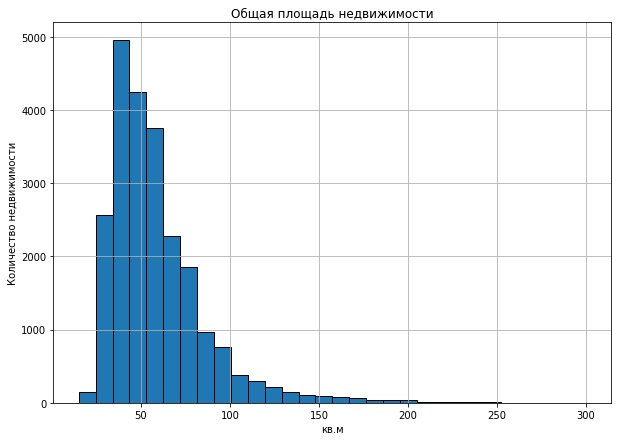

In [63]:
df.hist('total_area',bins=30, figsize=(10, 7), ec='black')

plt.title('Общая площадь недвижимости')
plt.xlabel('кв.м')
plt.ylabel('Количество недвижимости')
plt.show()

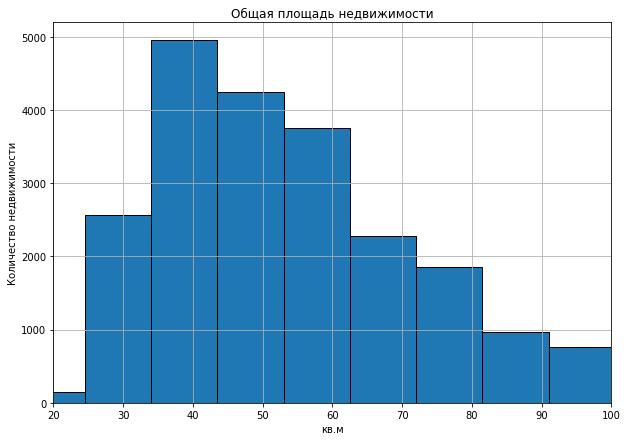

In [64]:
df.hist('total_area',bins=30, figsize=(10, 7), ec='black')

plt.xlim(20, 100)
plt.title('Общая площадь недвижимости')
plt.xlabel('кв.м')
plt.ylabel('Количество недвижимости')
plt.show()

*Выглядит нормально. Чаще всего встречается площадь объекта от 25 до 70 кв.м. Так же есть "хвост" справа, который можно списать на элитную недвижимость* 

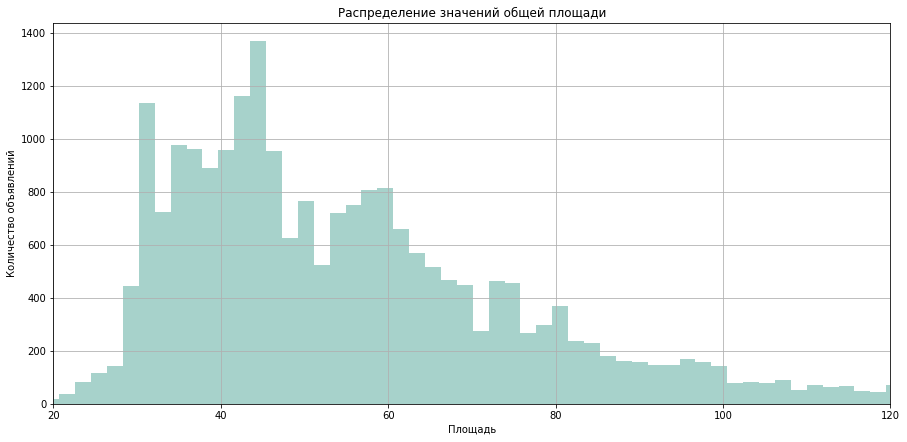

In [65]:
# код ревьюера


df['total_area'].hist(bins = 150, figsize = (15, 7), color='#A7D2CB')
plt.xlim(20, 120)

plt.title('Распределение значений общей площади')
plt.xlabel('Площадь') 
plt.ylabel('Количество объявлений')
plt.show()

**Жилая площадь**

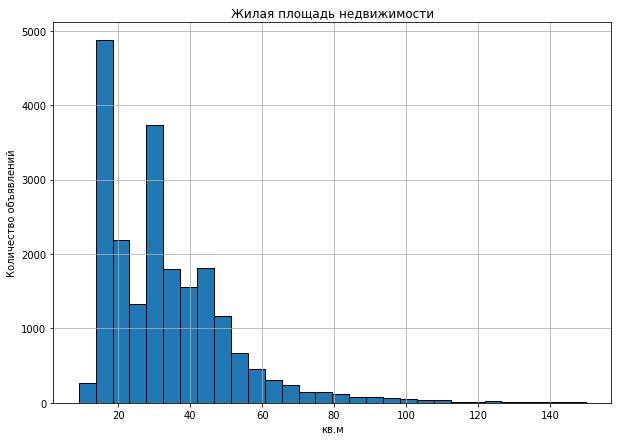

In [66]:
df.hist('living_area',bins=30, figsize=(10, 7), ec='black')

plt.title('Жилая площадь недвижимости')
plt.xlabel('кв.м')
plt.ylabel('Количество объявлений')
plt.show()

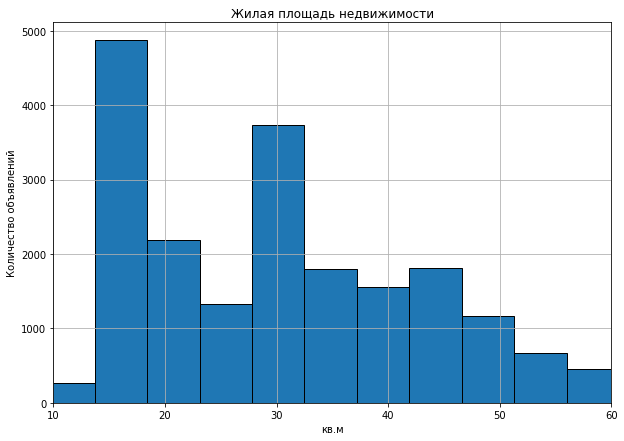

In [67]:
df.hist('living_area',bins=30, figsize=(10, 7), ec='black')

plt.xlim(10, 60)
plt.title('Жилая площадь недвижимости')
plt.xlabel('кв.м')
plt.ylabel('Количество объявлений')
plt.show()

*Есть два пика один примерно на 18-19 кв.м, второй на 30 кв.м. "Хвост" справа  так же является элитным жильём.*

**Площадь кухни**

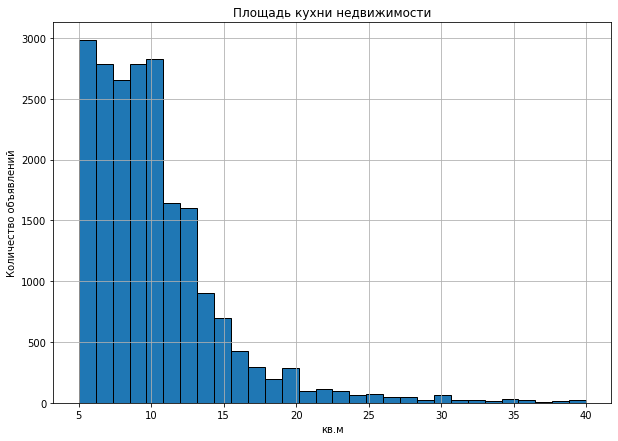

In [68]:
df.hist('kitchen_area', bins=30, figsize=(10, 7), ec='black')

plt.title('Площадь кухни недвижимости')
plt.xlabel('кв.м')
plt.ylabel('Количество объявлений')
plt.show()

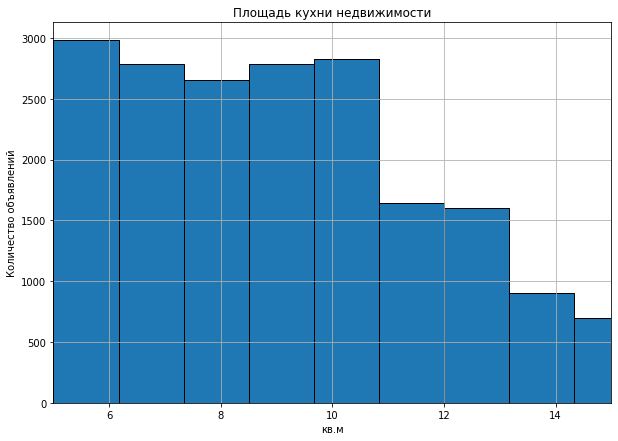

In [69]:
df.hist('kitchen_area', bins=30, figsize=(10, 7), ec='black')

plt.xlim(5,15)
plt.title('Площадь кухни недвижимости')
plt.xlabel('кв.м')
plt.ylabel('Количество объявлений')
plt.show()

#*Выглядит  хорошо, чаще всего встречается площадь кухни примерно от 5 кв.м до 11 кв.м. "Хвост" справа  так же является элитным жильём.*


**Цена объекта**

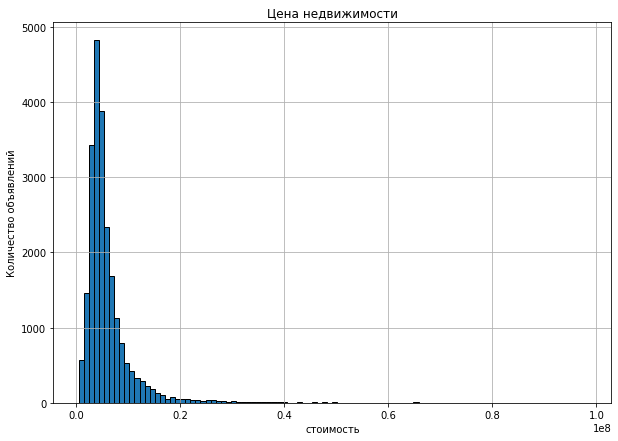

In [70]:
df.hist('last_price', bins=100, figsize=(10, 7), ec='black')

plt.title('Цена недвижимости')
plt.xlabel('стоимость')
plt.ylabel('Количество объявлений')
plt.show()

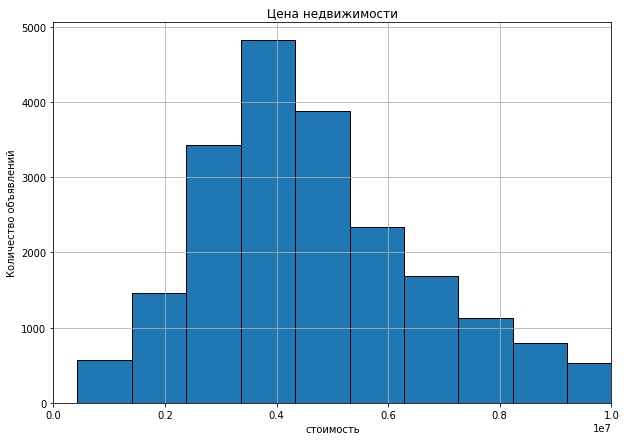

In [71]:
df.hist('last_price', bins=100, figsize=(10, 7), ec='black')

plt.xlim(0,10000000)
plt.title('Цена недвижимости')
plt.xlabel('стоимость')
plt.ylabel('Количество объявлений')
plt.show()

*Выглядит нормально. Чаще всего цена варьируется от 3 до 5 млн.руб*

**Количество комнат**

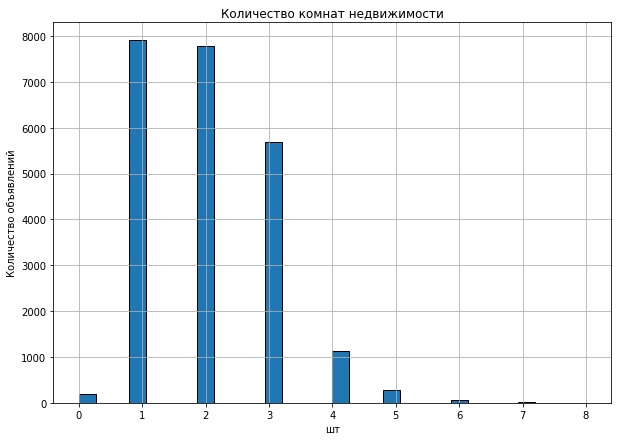

In [72]:
df.hist('rooms',bins=30, figsize=(10, 7), ec='black')

plt.title('Количество комнат недвижимости')
plt.xlabel('шт')
plt.ylabel('Количество объявлений')
plt.show()

*Чаще всего встречаются однокомнатные и двухкомнатные, реже трехкомнатные*

#### **Высота потолков**

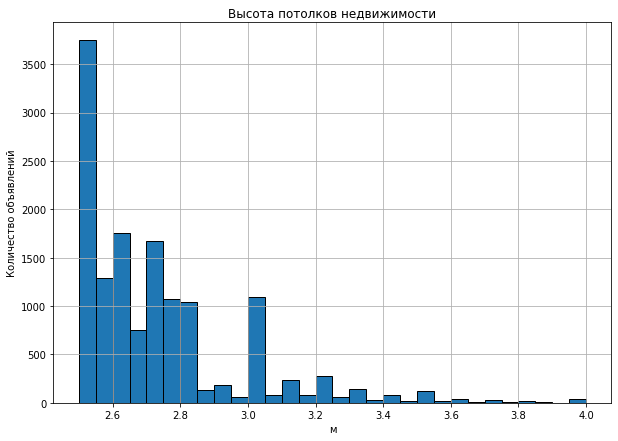

In [73]:
df.hist('ceiling_height',bins=30, figsize=(10, 7), ec='black')

plt.title('Высота потолков недвижимости')
plt.xlabel('м')
plt.ylabel('Количество объявлений')
plt.show()

 *Чаще всего встречаются значения от 2.5м до 2.8м, что логично.*

#### **Этаж квартиры**

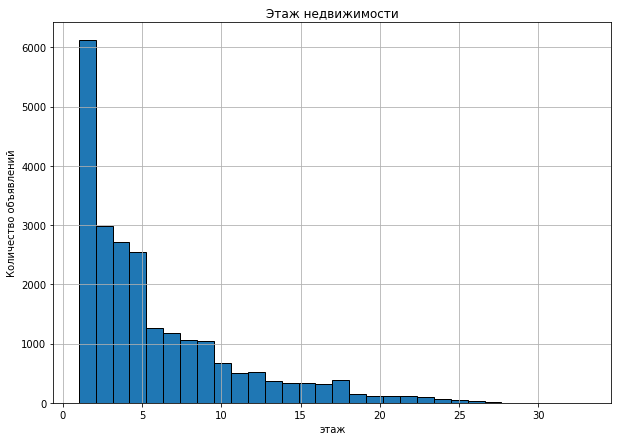

In [74]:
df.hist('floor',bins=30, figsize=(10, 7), ec='black')

plt.title('Этаж недвижимости')
plt.xlabel('этаж')
plt.ylabel('Количество объявлений')
plt.show()

*Больше всего недвижимости  которая находится с 1 по 5 этаж, что логично – в Санкт-Петербурге не так много небоскрёбов.*

#### **Тип этажа квартиры («первый», «последний», «другой»)**

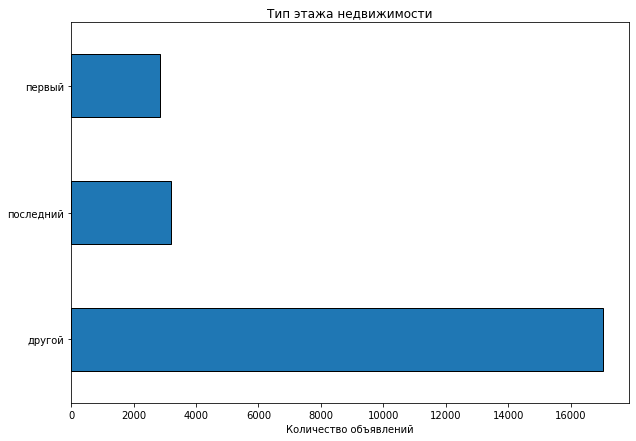

In [75]:
(df['floor_category']
    .value_counts()
    .plot(kind='barh', figsize=(10, 7), ec='black'))

plt.title('Тип этажа недвижимости')
plt.xlabel('Количество объявлений')
plt.show()

*Больше всего  квартир на "другом" этаже*

#### **Общее количество этажей в доме**

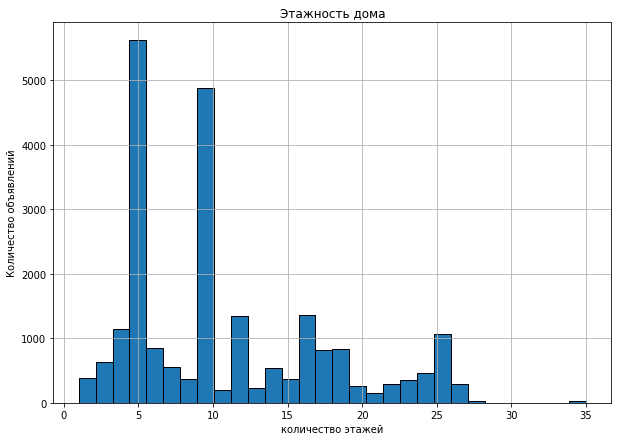

In [76]:
df.hist('floors_total', bins=30, figsize=(10, 7), ec='black')

plt.title('Этажность дома')
plt.xlabel('количество этажей')
plt.ylabel('Количество объявлений')
plt.show()

*Чаще всего встречаются пятиэтажки и девятиэтажки, опять же логично,т.к.в СПб очень мало высоток*

#### **Расстояние до центра города в метрах**

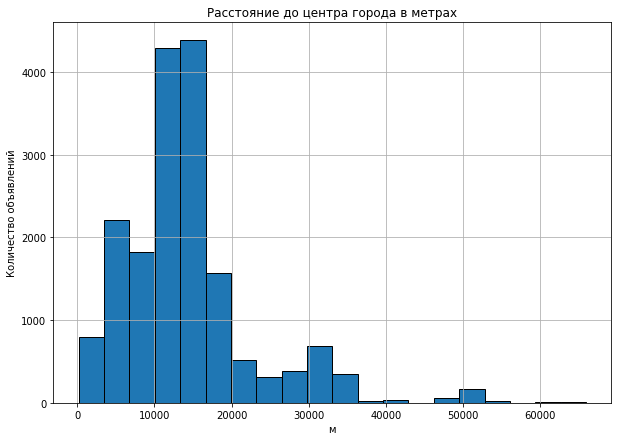

In [77]:
df.hist('centers_nearest', bins=20, figsize=(10, 7), ec='black')

plt.title('Расстояние до центра города в метрах')
plt.xlabel('м')
plt.ylabel('Количество объявлений')
plt.show()

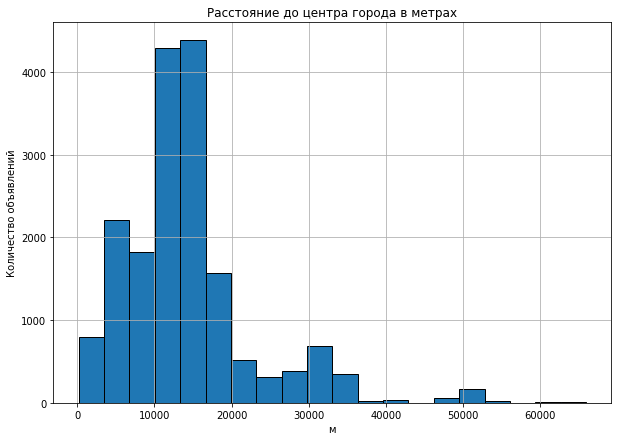

In [78]:
df.hist('centers_nearest', bins=20, figsize=(10, 7), ec='black')

plt.title('Расстояние до центра города в метрах')
plt.xlabel('м')
plt.ylabel('Количество объявлений')
plt.show()

*Больше всего объектов находится на расстоянии 10-16км до центра города.*

#### **Расстояние до ближайшего аэропорта**

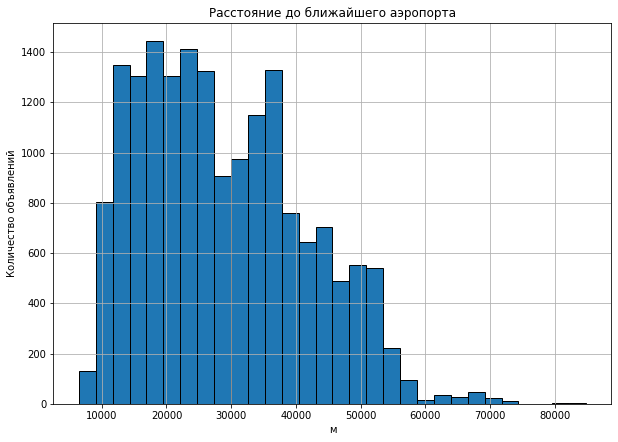

In [79]:
df.hist('airports_nearest',bins=30, figsize=(10, 7), ec='black')

plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('м')
plt.ylabel('Количество объявлений')
plt.show()

*Выглядит нормально.*

#### **Расстояние до ближайшего парка**

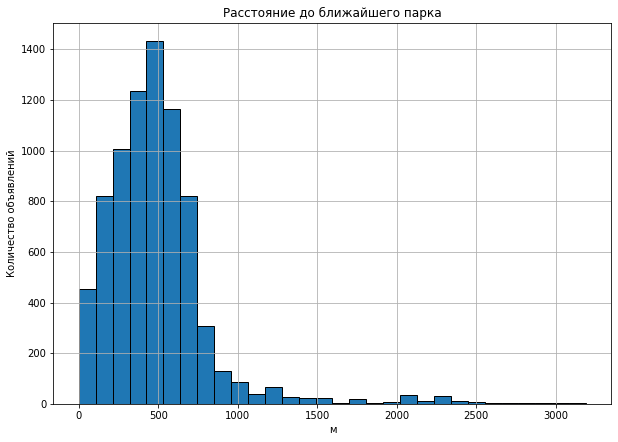

In [80]:
df.hist('parks_nearest',bins=30, figsize=(10, 7), ec='black')

plt.title('Расстояние до ближайшего парка')
plt.xlabel('м')
plt.ylabel('Количество объявлений')
plt.show()

*Из объявлений где заполнены данные о парках(доля таких мала),чаще всего встречается недвижимость с расстоянием до парка до 800м*

#### **День и месяц публикации объявления**


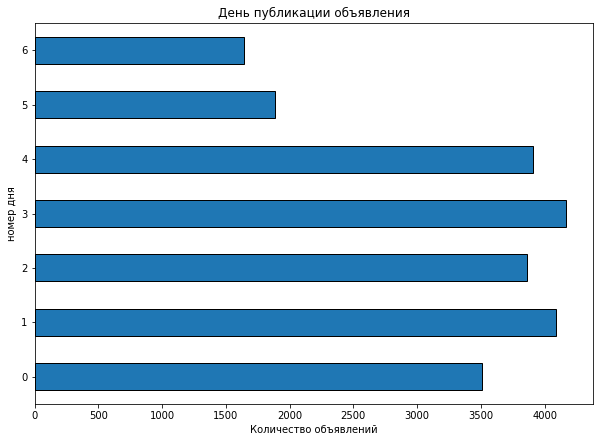

In [81]:
df.groupby('weekday')['weekday'].count().plot(kind='barh', figsize=(10, 7), ec='black')
plt.title('День публикации объявления')
plt.ylabel('номер дня')
plt.xlabel('Количество объявлений')
plt.show()

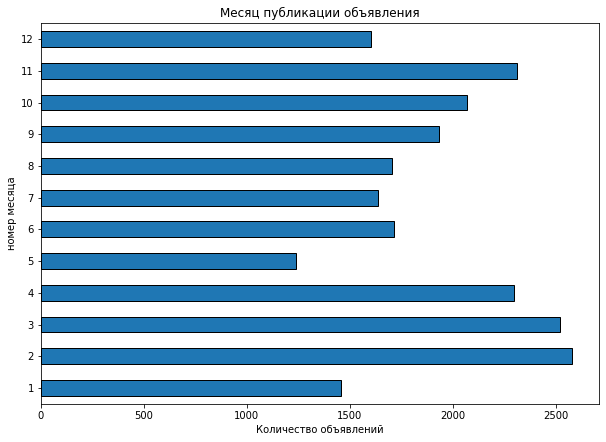

In [82]:
df.groupby('month')['month'].count().plot(kind='barh', figsize=(10, 7), ec='black')

plt.title('Месяц публикации объявления')
plt.ylabel('номер месяца')
plt.xlabel('Количество объявлений')
plt.show()

*Меньше всего объявлений выкладывали в выходные. Больше всего в четверг.  Больше всего объявленний выкладывали с февраля по апрель. Меньше всего в январе и мае.*

#### **Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.**

* Построим гистограмму.
* Посчитаем среднее и медиану.
* В ячейке типа markdown опишем, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими.


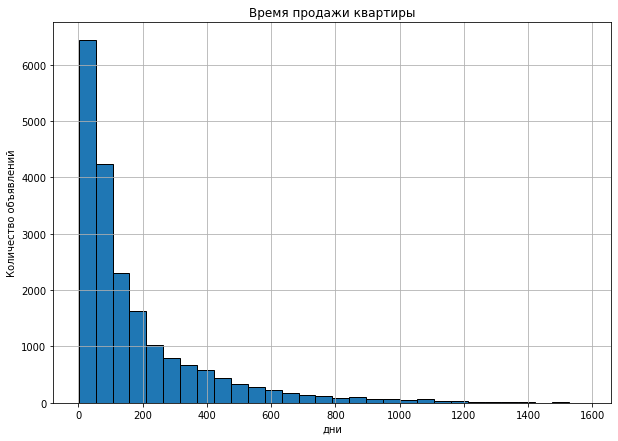

In [83]:
df.hist('days',bins=30, figsize=(10, 7), ec='black')

plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('Количество объявлений')
plt.show()

In [84]:
df['days'].describe()

count    19995.000000
mean       179.663716
std        218.537493
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days, dtype: float64

In [85]:
print('Среднее время продажи:',int(df['days'].mean()))
print('Медианное время продажи:',int(df['days'].median()))

Среднее время продажи: 179
Медианное время продажи: 95


*Посмотрим "поближе", изменим масштаб гистограммы*

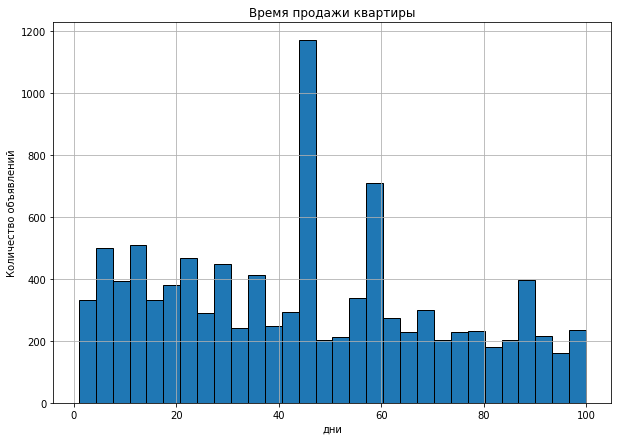

In [86]:
df.hist('days', bins=30, range=(1, 100), figsize=(10, 7), ec='black')

plt.title('Время продажи квартиры')
plt.xlabel('дни')
plt.ylabel('Количество объявлений')
plt.show()

Рассмотрев гистограмму "поближе" обнаружили два явных пика. Если посмотреть правила размещения "Яндекс.Недвижимость" https://yandex.ru/support/realty/owner/home/add-ads-housing.html, можно понять, что пииков намного больше: 7, 14, 21, 45, 60, 90. После этих сроков объявление считается неактуальным и снимается автоматически. Исключать такие данные нельзя, ибо возможно в то время недвижимость еще продавалась.


#### **Вывод:**
Исхоядя из проведённого исследования. Можно сделать вывод, что быстрой считается продажа. Можно предположить что быстрой продажой считается до 45 дней. От 229 долгой. Чаще всего квартиры продавались за 100, но бывало и намного дольше.

#### **Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

Изучим зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Построим графики, которые покажут зависимость цены от указанных выше параметров.


#### **Общая площадь**

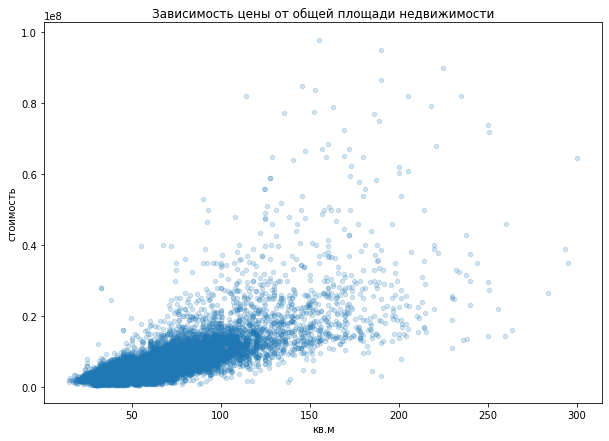

In [87]:
df.plot(x='total_area', y='last_price',kind='scatter', style='o',alpha=0.2, figsize=(10, 7))

plt.title('Зависимость цены от общей площади недвижимости')
plt.xlabel('кв.м')
plt.ylabel('стоимость')
plt.show()

*Явно видна зависимость - чем больше площадь квартиры, тем выше цена.*

#### **Жилая площадь**

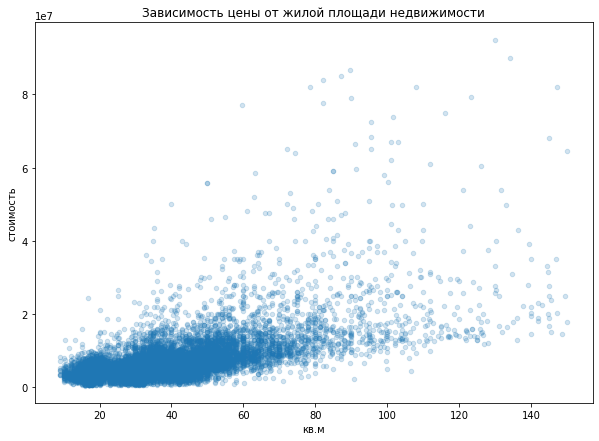

In [88]:
df.plot(x='living_area', y='last_price',kind='scatter', style='o',alpha=0.2, figsize=(10, 7))
plt.title('Зависимость цены от жилой площади недвижимости')
plt.xlabel('кв.м')
plt.ylabel('стоимость')
plt.show()

*Явно видна зависимость - чем больше жилая площадь квартиры, тем выше цена.*

#### **Площадь кухни**

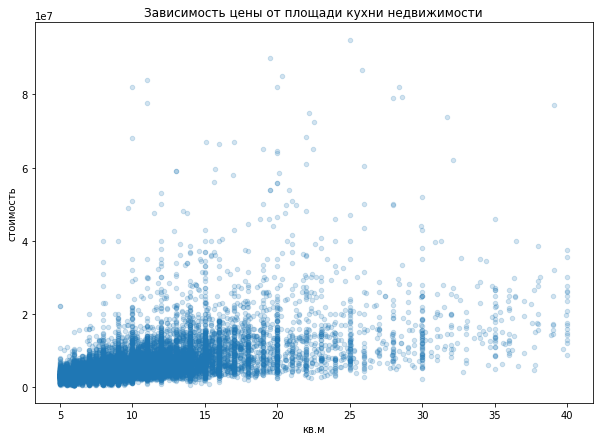

In [89]:
df.plot(x='kitchen_area', y='last_price',kind='scatter', style='o',alpha=0.2, figsize=(10, 7))
plt.title('Зависимость цены от площади кухни недвижимости')
plt.xlabel('кв.м')
plt.ylabel('стоимость')
plt.show()

*Явно видна зависимость - чем больше площадь кухни, тем выше цена.*

#### **Количество комнат**

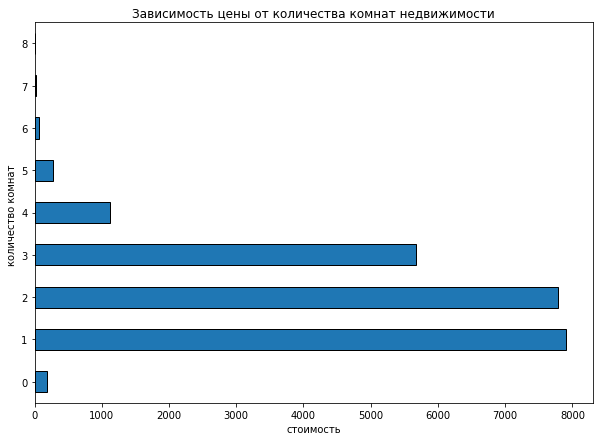

In [90]:
df.groupby('rooms')['rooms'].count().plot(kind='barh', figsize=(10, 7), ec='black')

plt.title('Зависимость цены от количества комнат недвижимости')
plt.xlabel('стоимость')
plt.ylabel('количество комнат ')
plt.show()

*Есть некоторая зависимость, квартиры с 1-3 комнатами стоят намого больше, возможно падение цены после 3 объясняется тем, что хоть комнат и много, но площадь их маленькая*

#### **Этаж**

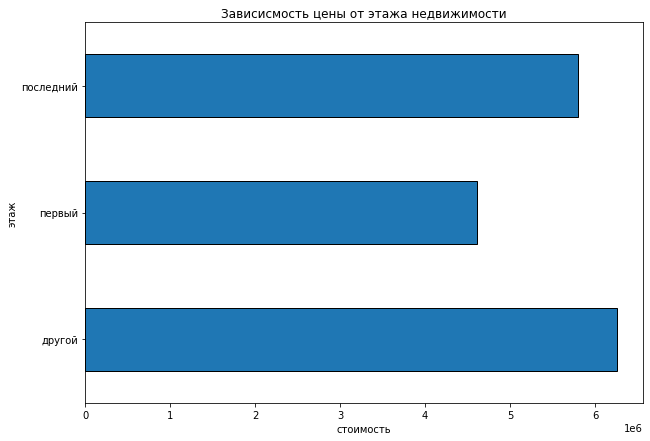

In [91]:
df.groupby('floor_category')['last_price'].mean().plot(kind='barh', figsize=(10, 7), ec='black')

plt.title('Зависисмость цены от этажа недвижимости')
plt.ylabel('этаж')
plt.xlabel('стоимость')
plt.show()

*Зависимость цены от этажа прослеживается, но не особо сильная. Самые дешевые квартиры на первом этаже, дороже на последнем и самые дорогие на других этажах*

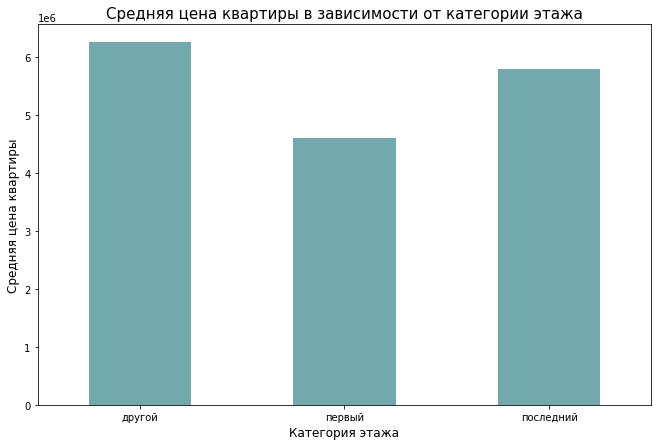

In [92]:
# код ревьюера

df.groupby('floor_category')['last_price'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средняя цена квартиры в зависимости от категории этажа', size=15)
plt.xlabel('Категория этажа', size=12)
plt.ylabel('Средняя цена квартиры', size=12)

plt.show()

#### **Дата размещения**

**День**

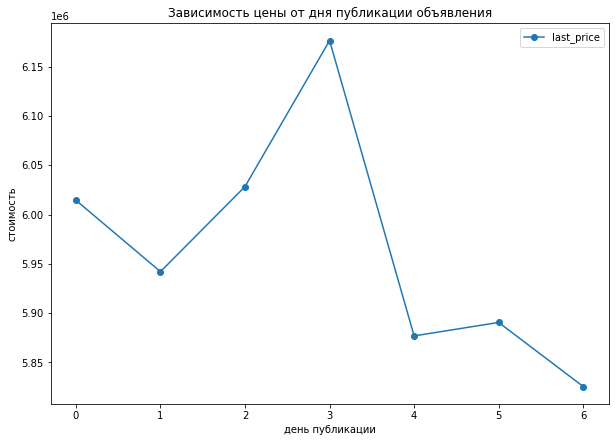

In [93]:
df.pivot_table(index='weekday', values='last_price').plot(style='o-', figsize=(10, 7))

plt.title('Зависимость цены от дня публикации объявления')
plt.xlabel('день публикации')
plt.ylabel('стоимость')
plt.show()

*Видна зависимомсть, что квартиры опубликованные в четверг дороже всего, дешевле всего опубликованные в воскресенье.* 

**Месяц**

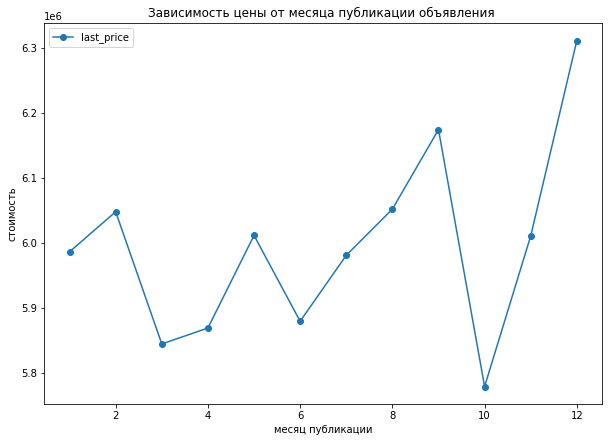

In [94]:
df.pivot_table(index='month', values='last_price').plot(style='o-', figsize=(10, 7))

plt.title('Зависимость цены от месяца публикации объявления ')
plt.xlabel('месяц публикации')
plt.ylabel('стоимость')
plt.show()

*Видна зависимомсть, что квартыры опубликованные в октябре дешевле всего, дороже всего те, что опубликовали в декабре.*

**Год**

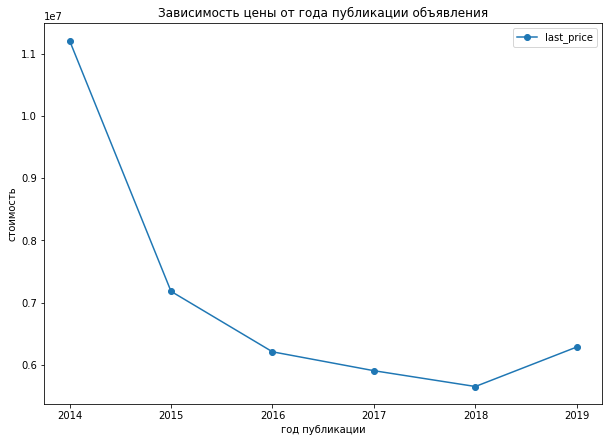

In [95]:
df.pivot_table(index='year', values='last_price').plot(style='o-', figsize=(10, 7))

plt.title('Зависимость цены от года публикации объявления')
plt.xlabel('год публикации')
plt.ylabel('стоимость')
plt.show()

*Зависимость есть. Квартиры резко подешевели в 2015 году и цена падала до 2018. В 2019 году цены снова стали повышаться.*

####  **Вывод:** 
Больше всего на стоимость влияет площадь(общая,жилая,кухня), следовательно и количество комнат тоже влияет на стоимость. У объектов, которые находятся на первом и последнем этажах стоимость значительно ниже, чем на других.

#### **Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name**

In [96]:
top=df.pivot_table(index='locality_name',values='price_one_meter',aggfunc=('count','mean'))
top.columns=['count','mean']
tc=top.sort_values('count',ascending=False).head(10)
tc

,count,mean
locality_name,,
санкт-петербург,15261,112760.750279
поселок мурино,546,85493.512143
поселок шушары,437,78538.976117
всеволожск,396,68670.459639
пушкин,355,102856.686716
колпино,336,75352.475583
поселок парголово,326,90205.423758
гатчина,302,68846.422359
деревня кудрово,299,92473.547576


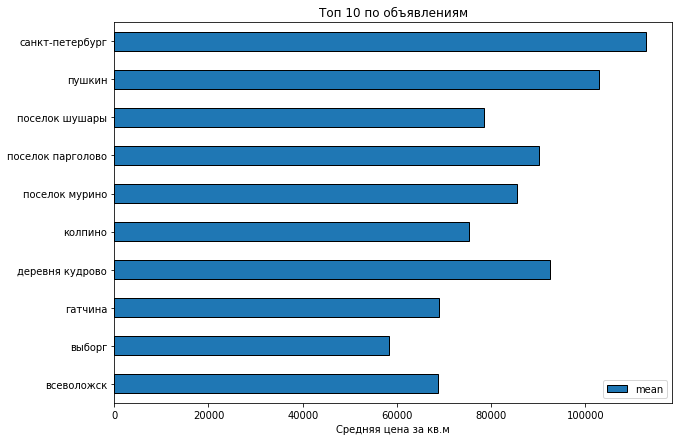

In [97]:
tc.pivot_table(index = 'locality_name', values = 'mean').plot(kind='barh', ec='black', figsize=(10, 7))
plt.title('Топ 10 по объявлениям')
plt.xlabel('Средняя цена за кв.м')
plt.ylabel('')
plt.show()

In [98]:
tc[tc['mean']==tc['mean'].max()]


,count,mean
locality_name,,
санкт-петербург,15261,112760.750279


Самая низкая стоимость квадратного метра:

In [99]:
tc[tc['mean']==tc['mean'].min()]

,count,mean
locality_name,,
выборг,233,58237.901847


#### **Вывод:**
Отсортировали данные по числу объявлений.Выделили топ 10 и города с самой большой и самой низкой ценой за квадратный метр. Наибольшая цена за кв.м в Санкт-Петебурге(112611 руб/кв.м). Самая низкая цена в Выборге(58238 руб/кв.м).

#### **Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.**

In [100]:
spb = df.query('locality_name == "санкт-петербург"')

In [101]:
spb.head()

,total_images,last_price,total_area,first_day,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_3000,ponds_nearest,days,price_one_meter,weekday,month,year,floor_category,centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
6,5,7915000,71.6,2019-04-18,2,NaN,24,NaN,22,False,...,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой,12.0
8,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,False,...,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой,15.0


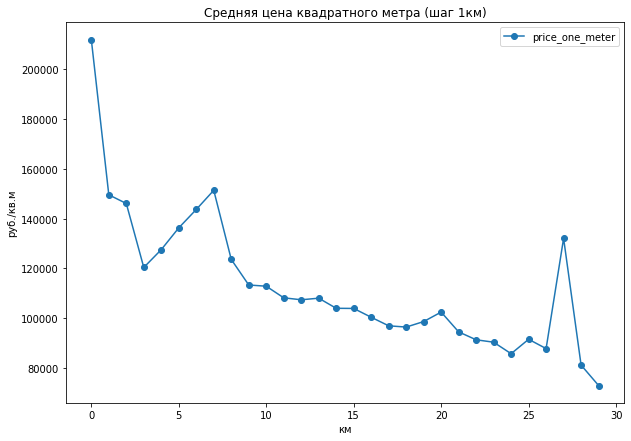

In [102]:
spb.pivot_table(index='centers_nearest_km', values='price_one_meter').plot(marker='o', figsize=(10, 7))

plt.title('Средняя цена квадратного метра (шаг 1км)')
plt.xlabel('км')
plt.ylabel('руб./кв.м')
plt.show()

#### **Вывод:** 
По графику видно, что максимальная стоимость недвижимости у самого центра(до 1км).Стоимость чуть меньше, но всё так же высокая до 8км. Затем, в зависимости отдалённости от центра, стоимость уменьшается. Пик на  28км можно объъяснить элитным жильём. Можно сделать вывод  чем ближе к центру тем дороже жильё.

### Общий вывод

В ходе исследования был изучен полученный файл. По возможности были обработаны пропущенные значения там, где это было необходимо. Был посчитан и добавлен в таблицу столбец с ценой квадратного метра, были выведены и добавлены столбцы с днём, месяцем и годом публикации объявления. Были определены и исправлены некорректные данные, удалены аномальные значения. 

Построены и описаны гистограммы по каждому из параметров объявления. Описано как быстро продавались квартиры. Построены графики и описано какие факторы больше всего влияют на стоимость объекта. Определено топ 10 населённых пунктов по количеству объявлений, так же посчитана их средняя цену за квадратный метр.  Определены населенные пункты с самой дорогой и самой дешёвой средней ценой за квадратный метр. Описано, как стоимость объектов в Санкт-Петербурге зависит от расстояния до центра города.

* Ожидаемое время продажи: 45 - 171 дней.
* Быстрые продажи - до 45 дней, долгие – больше 229 дней.
* Цена в основном зависит от площади квартиры, так же есть связь с этажностью (не первый и не последний).
* Так же на стоимость влияет расстояние до центра города (чем ближе к центру тем выше стоимость). Зона центра растягивается на 8 км. 
* Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге - 112611 руб./кв.м. А самая низкая средняя стоимость квадратного метра в Выборге - 58238 руб./кв.м.

**Представление о типичном объекте недвижимости.**
* <u>Количество комнат</u>: 1-3 комнаты
* <u>Этажность</u>: Пяти или девяти этажный дом
* <u>Этаж квартиры</u>: Не первый и не последний
* <u>Общая площадь</u>: от 25 до 70 кв.м
* <u>Высота потолков</u>: от 2.5м до 2.8м
* <u>Стоимость</u>: от 3 до 5 млн.руб
* <u>Удаление от центра</u>: до 8 км.
* <u>Удаление от аэропорта</u>: от 10 до 50 км. 
* <u>Расстояние до парка</u>: до 800м 